Purpose: look at the custom distrust dictionary. See if it can be improved. At least use stemming. Then, look to build a trust dictionary.

Thought: some basic $\chi^2$ analysis might help guide this process.

In [63]:
import collections

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from pan20 import fake
from pan20.util import chis, text
from pan20.util.lexicons import trust

In [64]:
df = fake.load()
df['toks'] = df.tweet.apply(text.tokenize)

In [72]:
tl = trust.Lexicon()
dfd = df.copy()
dfd['distrust'] = dfd.toks.apply(tl.distrust_freq)

In [73]:
dfd = dfd.groupby(['author', 'label']).mean().reset_index()

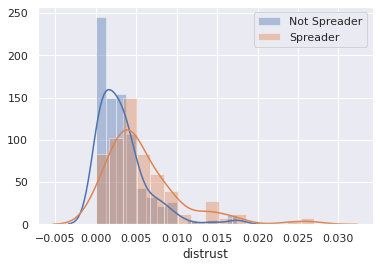

In [74]:
_ = sns.distplot(dfd[dfd.label == False].distrust, label='Not Spreader')
_ = sns.distplot(dfd[dfd.label == True].distrust, label='Spreader')
plt.legend()
plt.show()

### $\chi^2$

In [22]:
c0 = collections.Counter()
c1 = collections.Counter()
for _, x in df.iterrows():
    if x.label:
        c1.update(x.toks)
    else:
        c0.update(x.toks)        
chi = chis.get_chis(c0, c1)

In [28]:
chi[chi.c2 > chi.c1].iloc[200:].head(50)

,token,c1,c2,n1,n2,chi
3976,melania,3,20,19574,19398,0.000327
552,israeli,3,20,19574,19398,0.000327
7719,emergency,6,26,19574,19398,0.000326
7111,npr,4,22,19574,19398,0.000324
9484,ap,5,24,19574,19398,0.000324
10683,flag,5,24,19574,19398,0.000324
2416,cooper,5,24,19574,19398,0.000324
709,message,33,68,19574,19398,0.000320
489,calls,47,87,19574,19398,0.000317
2348,florida,17,44,19574,19398,0.000313


In [40]:
wanted = [
    'says', 'facts', 'presented', 'honoring', 'scandal', 'law', 'posted', 'slams',
    'reveals', 'missing', 'breaking', 'sucker', 'lying', 'scam', 'cheating',
    'admit', 'law', 'laws', 'economy', 'helped', # helped what? help do something bad?
    'claims', 'twists', 'alright', 'became', 'fraud', 'cheated', 'security',
    'control', 'corruption', 'lies', 'hateful', 'emergency', 'true', 
    'pushes', 'destroy', 'saved', 'arrest', 'rescue', 'health'
]